In [1]:
from utils import *

In [18]:
EJ=8.9
EC=2.5
EL=0.5
g_strength = 0.3

E_osc = 4

qubit_level = 4
osc_level = 7

In [19]:
qbt = scqubits.Fluxonium(EJ=EJ,EC=EC,EL=EL,flux=0,cutoff=30,truncated_dim=qubit_level)
osc = scqubits.Oscillator(E_osc=E_osc,truncated_dim=osc_level)
hilbertspace = scqubits.HilbertSpace([qbt, osc])
hilbertspace.add_interaction(g_strength=g_strength,op1=qbt.n_operator,op2=osc.creation_operator,add_hc=True)
hilbertspace.generate_lookup()
product_to_dressed = generate_single_mapping(hilbertspace.hamiltonian())
# plot_specturum(qbt, osc, hilbertspace)

In [22]:
product_to_dressed = generate_single_mapping(hilbertspace.hamiltonian())
a = hilbertspace.op_in_dressed_eigenbasis(op=osc.annihilation_operator)
a = qutip.Qobj(a[:, :])
 
(evals,) = hilbertspace["evals"]
diag_dressed_hamiltonian = (
        2 * np.pi * qutip.Qobj(np.diag(evals),
        dims=[hilbertspace.subsystem_dims] * 2)
)
diag_dressed_hamiltonian = qutip.Qobj(diag_dressed_hamiltonian[:, :])

leakage_dressed_state_osc_0 = product_to_dressed[(0,0)]
leakage_dressed_state_osc_1 = product_to_dressed[(0,1)]
w_d = transition_frequency(hilbertspace,leakage_dressed_state_osc_0,leakage_dressed_state_osc_1 )

# w_d = transition_frequency(hilbertspace,product_to_dressed[(0,0)], product_to_dressed[(0,1)])/2+transition_frequency(hilbertspace,product_to_dressed[(3,0)], product_to_dressed[(3,1)])/2

product_states = [(ql,ol) for ql in range(qubit_level) for ol in range(osc_level)]
idxs = [product_to_dressed[(s1, s2)] for (s1, s2) in product_states]
qutip_states = [qutip.basis(hilbertspace.dimension, idx) for idx in idxs]

leakage_dressed_state_osc_0 = product_to_dressed[(0,0)]
leakage_dressed_state_osc_1 = product_to_dressed[(0,1)]

tot_time = 50
tlist = np.linspace(0, tot_time, tot_time*2)

# matrix_element_driven = abs((a+a.dag()).data.to_array()[leakage_dressed_state_osc_0][leakage_dressed_state_osc_1])
matrix_element_driven = abs((a+a.dag()).data.toarray()[leakage_dressed_state_osc_0][leakage_dressed_state_osc_1])


# A_square = 1/tot_time
# A_square = A_square/matrix_element_driven
A_square = 0.05


def square_cos(t,*args):
    cos = np.cos(w_d * 2*np.pi * t)
    return  2*np.pi *A_square * cos

H_with_drive = [
    diag_dressed_hamiltonian,
    [a+a.dag(), square_cos]]

decay_term = np.sqrt(0.5*np.pi/75)*a

tot_time = tot_time*2
tlist = np.linspace(0, tot_time, tot_time*2)

results = []
for i in range(4):
    temp = delegate_to_mesolve(
        H = H_with_drive,
        state0=  qutip.basis(hilbertspace.dimension, product_to_dressed[(i,0)]),
        tlist = tlist,
        # e_ops=[state * state.dag() for state in qutip_states]+[a,
        #                                                        a.dag()*a,
        #                                                      ],
        options=qutip.Options(store_states=True,nsteps=1000,num_cpus = 8),
        # c_ops= [decay_term]
    )
    results.append(temp)

10.0%. Run time:   0.05s. Est. time left: 00:00:00:00
20.0%. Run time:   0.10s. Est. time left: 00:00:00:00
30.0%. Run time:   0.16s. Est. time left: 00:00:00:00
40.0%. Run time:   0.21s. Est. time left: 00:00:00:00
50.0%. Run time:   0.26s. Est. time left: 00:00:00:00
60.0%. Run time:   0.32s. Est. time left: 00:00:00:00
70.0%. Run time:   0.37s. Est. time left: 00:00:00:00
80.0%. Run time:   0.42s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00
Total run time:   0.53s
10.0%. Run time:   0.06s. Est. time left: 00:00:00:00
20.0%. Run time:   0.13s. Est. time left: 00:00:00:00
30.0%. Run time:   0.20s. Est. time left: 00:00:00:00
40.0%. Run time:   0.26s. Est. time left: 00:00:00:00
50.0%. Run time:   0.33s. Est. time left: 00:00:00:00
60.0%. Run time:   0.40s. Est. time left: 00:00:00:00
70.0%. Run time:   0.47s. Est. time left: 00:00:00:00
80.0%. Run time:   0.54s. Est. time left: 00:00:00:00
90.0%. Run time:   0.61s. Est. time left: 00:00:00:00
Tota

In [23]:
# first_dominant_freq =find_dominant_frequency(results[0].expect[-2],tlist)
# first_dominant_freq,w_d

In [30]:
results[0].states

list

In [31]:
product_states = [(ql,ol) for ql in range(qubit_level) for ol in range(osc_level)]
idxs = [product_to_dressed[(s1, s2)] for (s1, s2) in product_states]

nlevels = 4
from jax import vmap
import jax.numpy as jnp
tot_dims = a.shape[0]
g0 = jnp.zeros(tot_dims).at[product_to_dressed[(0, 0)]].set(1).reshape(-1, 1)
e0 = jnp.zeros(tot_dims).at[product_to_dressed[(1, 0)]].set(1).reshape(-1, 1)
f0 = jnp.zeros(tot_dims).at[product_to_dressed[(2, 0)]].set(1).reshape(-1, 1)
h0 = jnp.zeros(tot_dims).at[product_to_dressed[(3, 0)]].set(1).reshape(-1, 1)

pn_op = jnp.array((a.dag()*a).full())
a_op = jnp.array(a.full())

def compute_expectation(ket, operator):
    return (jnp.linalg.multi_dot([jnp.conj(ket).T, operator, ket]))[0][0]

# Vectorize the function over the kets
vectorized_compute_expectation = vmap(compute_expectation, in_axes=(0, None))

for i in range(nlevels):
    if hasattr(results[i], 'y'):
        states = jnp.array(results[i].y)  # assuming y contains JAX arrays
    elif hasattr(results[i], 'states'):
        states = jnp.stack([jnp.array(q.full()) for q in results[i].states])  # assuming states contains QObj

    results[i].expect = []
    for idx in idxs:
        dressed_state = jnp.zeros(tot_dims).at[idx].set(1).reshape(-1, 1)
        dressed_state_op = jnp.outer(dressed_state, jnp.conj(dressed_state).T)
        expectations = vectorized_compute_expectation(states, dressed_state_op)
        results[i].expect.append(expectations)
    alpha_expect = vectorized_compute_expectation(states, a_op)
    pns_expect = vectorized_compute_expectation(states, pn_op)
    results[i].expect.append(alpha_expect)
    results[i].expect.append(pns_expect)

# first_dominant_freq =find_dominant_frequency(results[0].expect[-2],tlist)
# first_dominant_freq,w_d

 /Users/jiakaiwang/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/jax/_src/array.py: 343

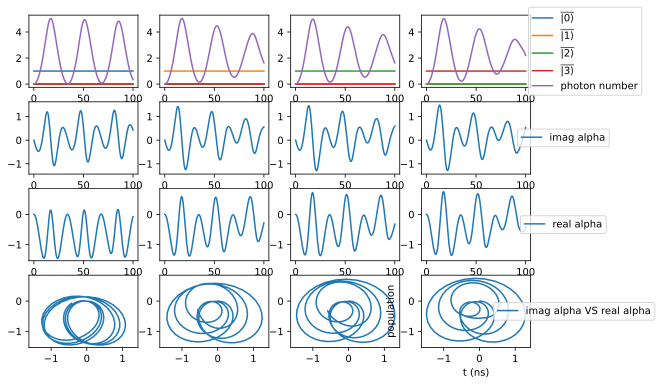

In [35]:

fig, axes = plt.subplots(4,nlevels, figsize=(9, 6))

for i in range(nlevels):
    qubit_state_population = [np.zeros(shape=len(tlist))]*qubit_level
    for idx, product_state in enumerate(product_states):
        ql = product_state[0]
        qubit_state_population[ql] += results[i].expect[idx]
    for ql in range(nlevels):
        axes[0][i].plot(tlist, qubit_state_population[ql], label=r"$\overline{|%s\rangle}$" % (f"{ql}"))
    

    #*np.exp(-1j * 2 * np.pi * first_dominant_freq * tlist) # *np.exp(-1j * 2 * np.pi * dominant_freq * tlist)  

    alpha = results[i].expect[-2]*np.exp(-1j * 2 * np.pi * w_d * tlist)

    # Coherent state eigenval
    real = alpha.real
    imag = alpha.imag
    axes[1][i].plot(tlist,imag , label=r"imag alpha")
    axes[2][i].plot(tlist, real, label=r"real alpha")
    axes[3][i].plot(-imag, real, label=r"imag alpha VS real alpha")
    
    # Photon number
    axes[0][i].plot(tlist, results[i].expect[-1], label=r"photon number")


axes[0][nlevels-1].legend(loc='center', ncol=1, bbox_to_anchor=(1.5, 0.5))
axes[1][nlevels-1].legend(loc='center', ncol=1, bbox_to_anchor=(1.3, 0.5))
axes[2][nlevels-1].legend(loc='center', ncol=1, bbox_to_anchor=(1.3, 0.5))
axes[3][nlevels-1].legend(loc='center', ncol=1, bbox_to_anchor=(1.4, 0.5))
plt.ylabel("population")
plt.xlabel("t (ns)")
for row in [0,1,2,3]:
    max_x_range,min_x_range,max_y_range,min_y_range = 0,0,0,0
    for col in range(nlevels):
        ymin, ymax = axes[row][col].get_ylim()
        xmin, xmax = axes[row][col].get_xlim()
        if ymax > max_y_range:
            max_y_range = ymax
        if ymin < min_y_range:
            min_y_range = ymin
        if xmax > max_x_range:
            max_x_range = xmax
        if xmin < min_x_range:
            min_x_range = xmin
    for col in range(nlevels):
        axes[row][col].set_ylim(min_y_range, max_y_range)
        axes[row][col].set_xlim(min_x_range,max_x_range)
# plt.yscale('log')
plt.show()

In [7]:
import qutip as qt

final_qubit_states = []
for initial_state in [0,1,2,3]:
    final_state = results[initial_state].states[-1]
    if final_state.type != 'oper':
        final_state = qt.ket2dm(qutip.Qobj(final_state))
    rho_product = qt.Qobj(dims = [[qubit_level,osc_level],[qubit_level,osc_level]])
    for (ql, ol), dressed_level in product_to_dressed.items():
        qubit_state = qt.basis(qubit_level, ql)
        osc_state = qt.basis(osc_level, ol)
        product_state = qt.tensor(qubit_state, osc_state)
        rho_product += product_state * product_state.dag() * final_state.data[dressed_level, dressed_level]
    qubit_rho = rho_product.ptrace(0)
    final_qubit_states.append(qubit_rho)


In [8]:
final_qubit_states[0]

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[9.99999990e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.69773224e-12 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.13594459e-10 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.15576128e-09]]

In [9]:
final_qubit_states[1]

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[5.77114221e-12 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.39902848e-12 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.13856423e-12]]

In [10]:
final_qubit_states[2]

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[2.33481666e-11 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.92057123e-12 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.48757231e-10]]

In [11]:
final_qubit_states[3]

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[6.46258694e-12 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.45947357e-10 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]]